In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np

In [35]:
# load from one folder back the data: data/raw/WDSA/InflowData_1.xlsx
# load from one folder back the data: data/raw/WDSA/WeatherData_1.xlsx

path_inflow = r'../data/raw/WDSA/InflowData_1.xlsx'
path_weather = r'../data/raw/WDSA/WeatherData_1.xlsx'
df_inflow = pd.read_excel(path_inflow, index_col=0, parse_dates=True, date_format='%d/%m/%Y %H:%M')
df_weather = pd.read_excel(path_weather, index_col=0, parse_dates=True, date_format='%d/%m/%Y %H:%M')

# interpolate inflow data linearly and drop nans
df_inflow = df_inflow.interpolate(method='linear', axis=0).dropna()
# interpolate weather data linearly and drop nans
df_weather = df_weather.interpolate(method='linear', axis=0).dropna()

# trim edges of dataset to make sure they start at the same moment, using the first starting dates of both dfs
start_index = max(df_inflow.index[0], df_weather.index[0])
end_index = min(df_inflow.index[-1], df_weather.index[-1])
df_inflow = df_inflow.loc[start_index:end_index]
df_weather = df_weather.loc[start_index:end_index]



In [24]:
df_A = df_inflow[['DMA A (L/s)']]

In [25]:
# normalize df_A
df_A = (df_A - df_A.mean()) / df_A.std()

In [32]:
# apply MaxPool to df_A
df_A['MaxPool A'] = df_A[['DMA A (L/s)']].rolling(4).max()
df_A['moving avg A'] = df_A[['DMA A (L/s)']].rolling(4).mean()

# compute residuals between original series and their rolling maxes and moving averages
df_A['residual A max'] = df_A['DMA A (L/s)'] - df_A['MaxPool A']
df_A['residual A avg'] = df_A['DMA A (L/s)'] - df_A['moving avg A']


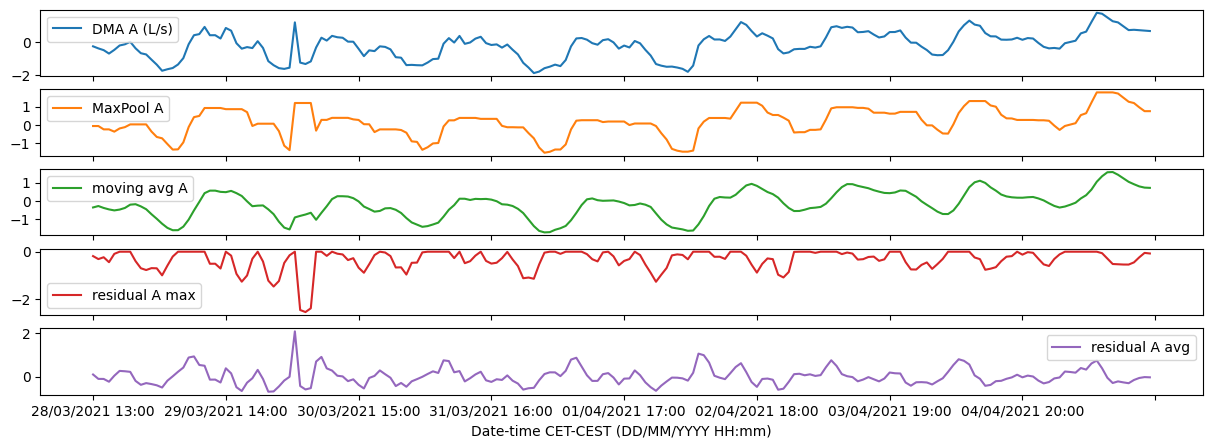

In [33]:
df_A[1000:1200].plot(subplots=True, figsize=(15, 5));

In [36]:
df_weather

,Rainfall depth (mm),Air temperature (°C),Air humidity (%),Windspeed (km/h)
Date-time CET-CEST (DD/MM/YYYY HH:mm),,,,
2021-02-14 20:00:00,0.0,4.7,34.0,13.0
2021-02-14 21:00:00,0.0,4.0,42.0,19.0
2021-02-14 22:00:00,0.0,3.7,41.0,27.0
2021-02-14 23:00:00,0.0,3.4,39.0,34.0
2021-02-15 00:00:00,0.0,2.7,37.0,30.0
...,...,...,...,...
2022-07-24 19:00:00,0.0,29.8,70.0,4.0
2022-07-24 20:00:00,0.0,29.3,66.0,2.0
2022-07-24 21:00:00,0.0,29.5,60.0,2.0


In [40]:
df_A = df_A[3:]
df_weather = df_weather[3:]

In [49]:
# normalize the weather data with avg std
df_weather = (df_weather - df_weather.mean()) / df_weather.std()

In [53]:
df_A = (df_A - df_A.mean()) / df_A.std()

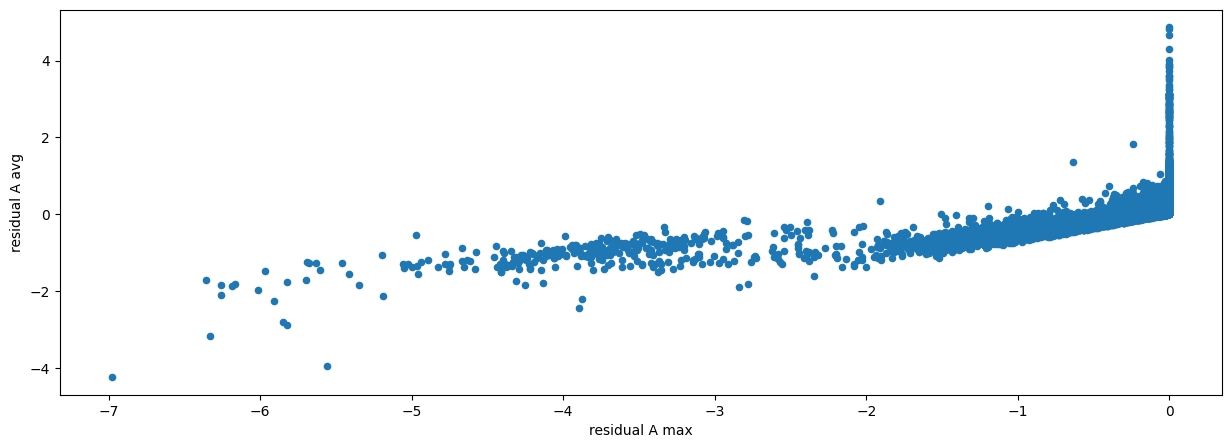

In [47]:
# see how well the residuals correlate with each others by means of making a scatter plot
df_A.plot.scatter(x='residual A max', y='residual A avg', figsize=(15, 5));

In [45]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Windspeed (km/h) vs residual A avg')

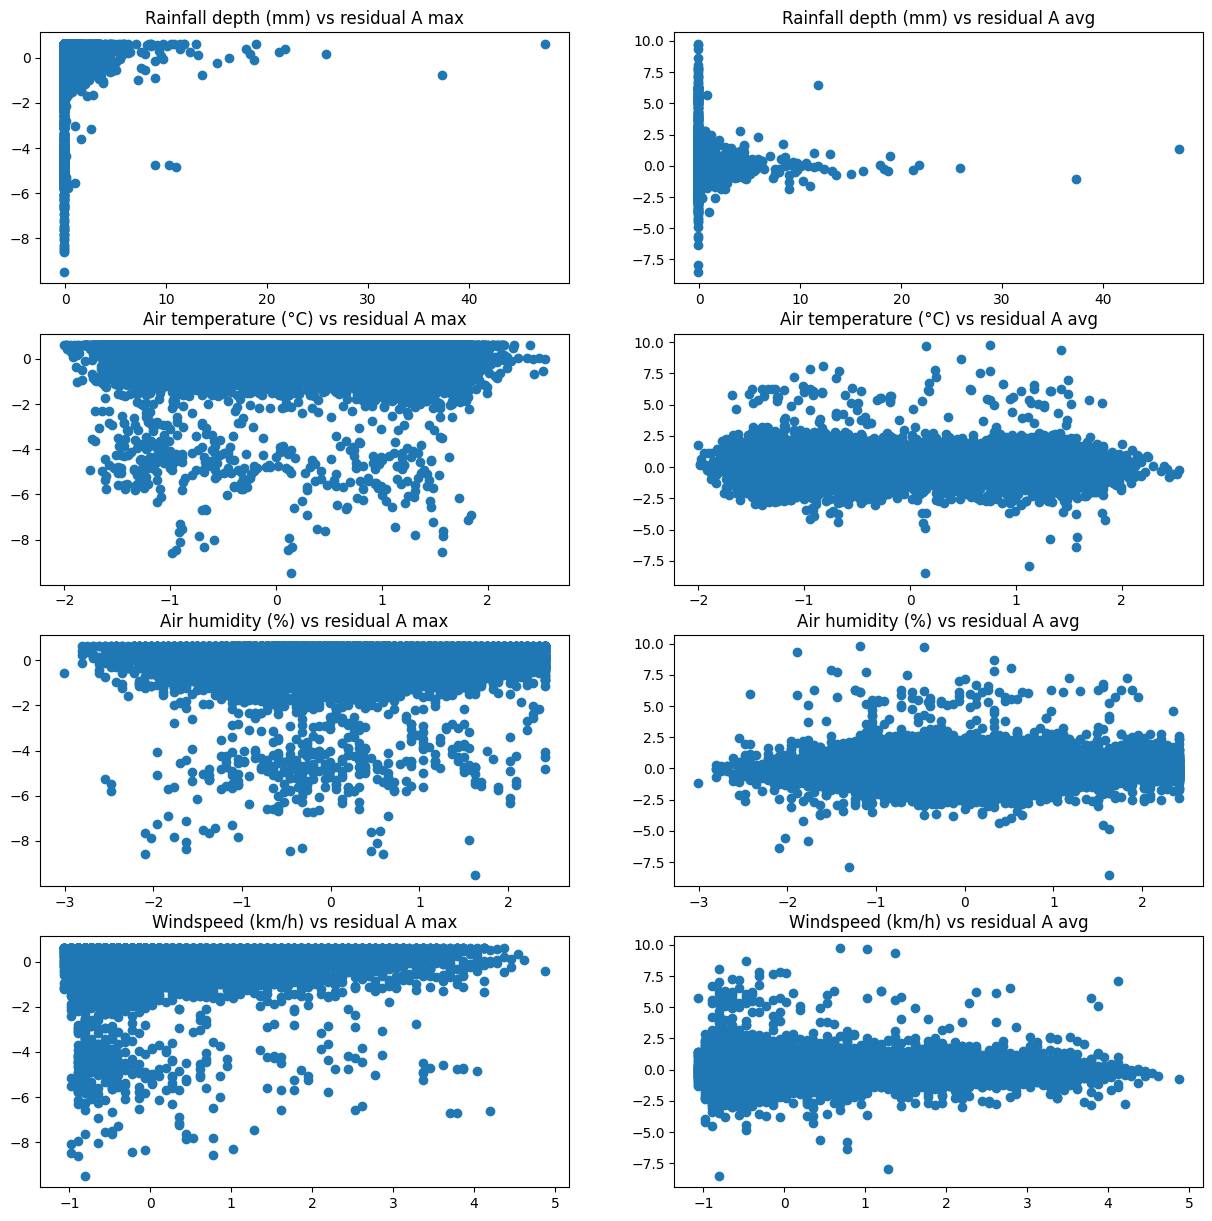

In [54]:
# plot the residual data against each of the weather variables as a scatter plot 
# Rainfall depth (mm)	Air temperature (°C)	Air humidity (%)	Windspeed (km/h)
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs[0,0].scatter(df_weather['Rainfall depth (mm)'], df_A['residual A max'])
axs[0,0].set_title('Rainfall depth (mm) vs residual A max')
axs[0,1].scatter(df_weather['Rainfall depth (mm)'], df_A['residual A avg'])
axs[0,1].set_title('Rainfall depth (mm) vs residual A avg')
axs[1,0].scatter(df_weather['Air temperature (°C)'], df_A['residual A max'])
axs[1,0].set_title('Air temperature (°C) vs residual A max')
axs[1,1].scatter(df_weather['Air temperature (°C)'], df_A['residual A avg'])
axs[1,1].set_title('Air temperature (°C) vs residual A avg')
axs[2,0].scatter(df_weather['Air humidity (%)'], df_A['residual A max'])
axs[2,0].set_title('Air humidity (%) vs residual A max')
axs[2,1].scatter(df_weather['Air humidity (%)'], df_A['residual A avg'])
axs[2,1].set_title('Air humidity (%) vs residual A avg')
axs[3,0].scatter(df_weather['Windspeed (km/h)'], df_A['residual A max'])
axs[3,0].set_title('Windspeed (km/h) vs residual A max')
axs[3,1].scatter(df_weather['Windspeed (km/h)'], df_A['residual A avg'])
axs[3,1].set_title('Windspeed (km/h) vs residual A avg')



In [52]:
# make correlation matrix between residuals and weather variables


residual A avg   NaN
dtype: float64

In [2]:
import torch 
import torch.nn as nn

class MultiQuantileLoss(nn.Module):
    def __init__(self, quantiles):
        super(MultiQuantileLoss, self).__init__()
        self.quantiles = quantiles
        self.num_quantiles = len(quantiles)

    def forward(self, y, y_hat, masked_loss=True):

        # y dimension: (batch_size, horizon_length, 1)
        # y_hat dimension: (batch_size, horizon_length, quantiles)
        
        # dimension of y_pred and y_true are: (batch_size, horizon_length, quantiles)
        losses = 0
        if masked_loss:
            nan_mask = ~torch.isnan(y)
        else:
            nan_mask = torch.ones_like(y).bool()
                
        for i, q in enumerate(self.quantiles):

            y_quantile = y_hat[:, :, i].unsqueeze(-1)

            
            diff = y-y_quantile
            mask = diff > 0
            loss = torch.mean((q * diff * mask - (1-q) * diff * ~mask)[nan_mask])


            losses += loss
        losses /= self.num_quantiles

        return losses


In [11]:
x = torch.linspace(0, 10, 100).unsqueeze(0) #[batch size, horizon length]
y_hat = torch.zeros_like(x) #torch.sin(x) 
y_hat_2 = y_hat-0.4#torch.sin(x)*1.2
y_hat_3 = y_hat+0.4#torch.sin(x)*0.8
# merge together to [batch size, horizon length, quantiles]
y_hat = torch.stack([y_hat_3, y_hat, y_hat_2], dim=-1)

y_ground_truth = (torch.sin(x) + torch.randn_like(x)*0.1).unsqueeze(-1) #[batch size, horizon length, 1]
quantiles = [0.2, 0.5, 0.8]


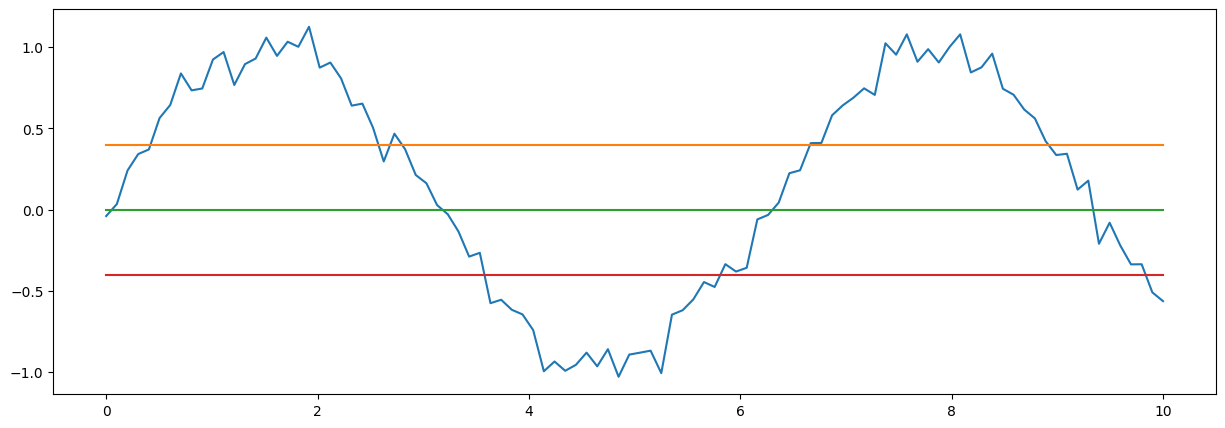

In [12]:
# plot y_ground_truth and y_hat quantiles
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(x.squeeze(), y_ground_truth.squeeze(), label='ground truth')
# plot different quantiles
for i, q in enumerate(quantiles):
    plt.plot(x.squeeze(), y_hat.squeeze()[:, i], label=f'quantile {q}')


In [13]:
l = MultiQuantileLoss(quantiles)
loss = l(y_ground_truth, y_hat, False)
loss

tensor(0.4028)

tensor(0.4028)
tensor(0.3945)
tensor(0.3887)
tensor(0.4160)
tensor(0.5231)
tensor(0.7392)
tensor(1.0392)
tensor(1.3892)
tensor(1.7892)
tensor(2.2392)


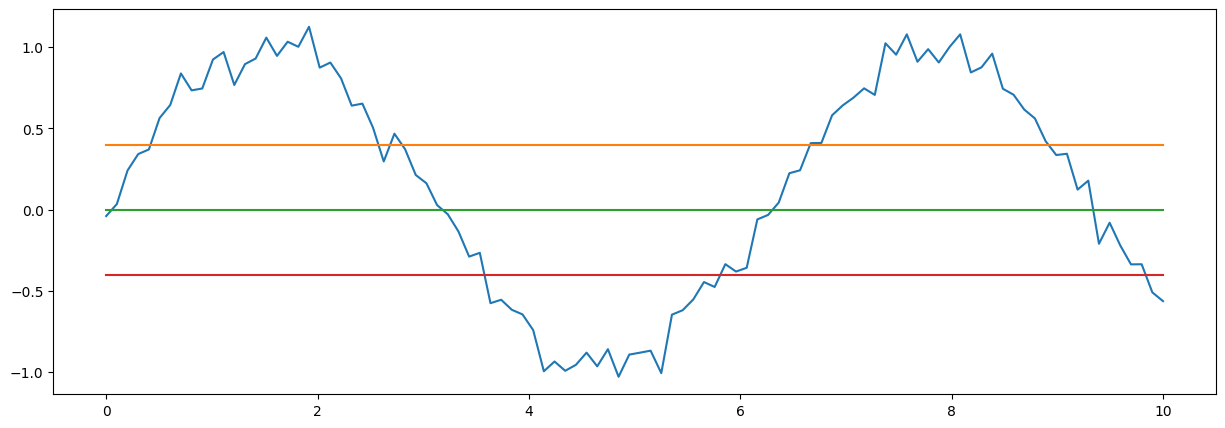

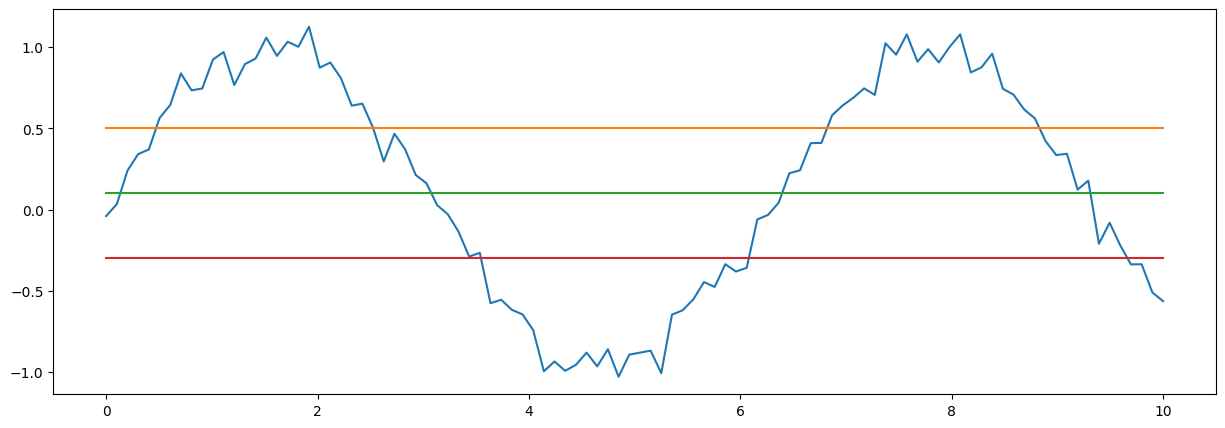

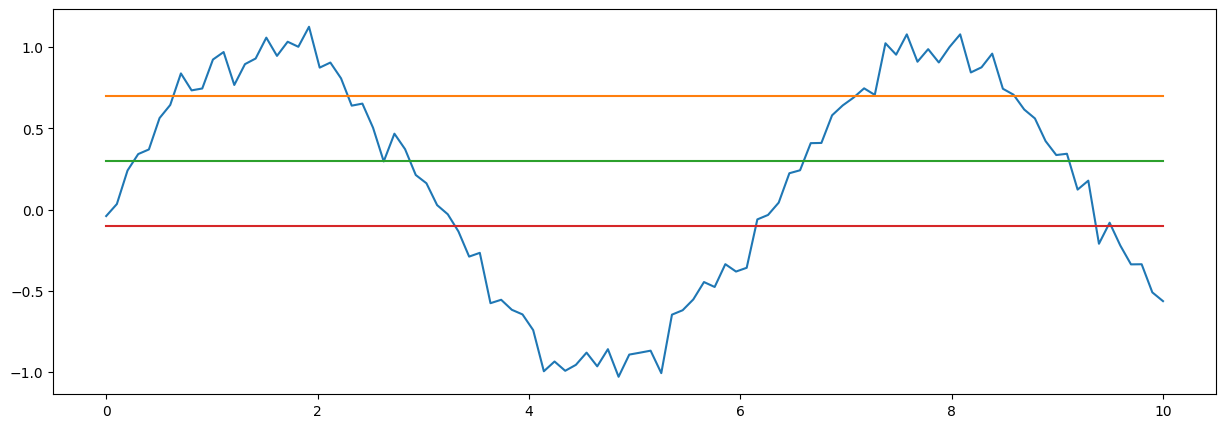

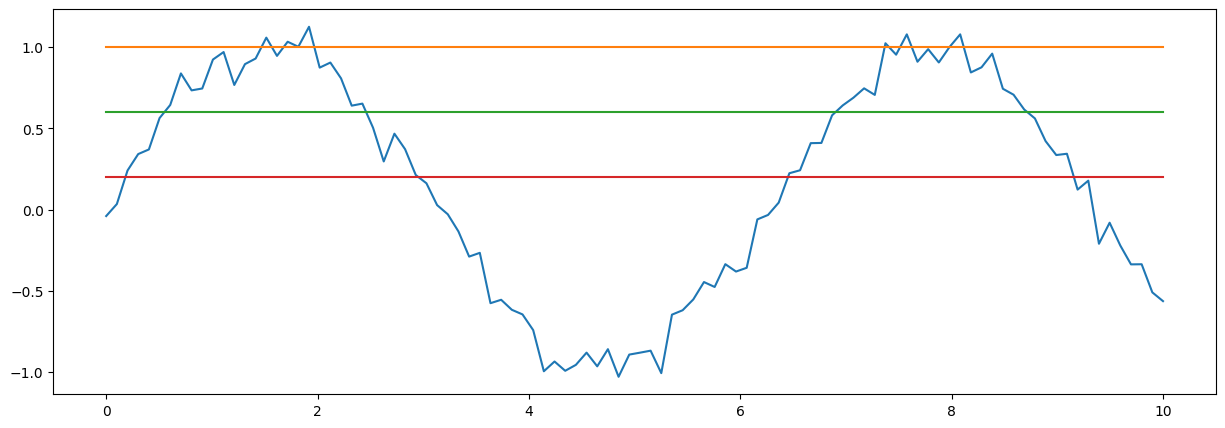

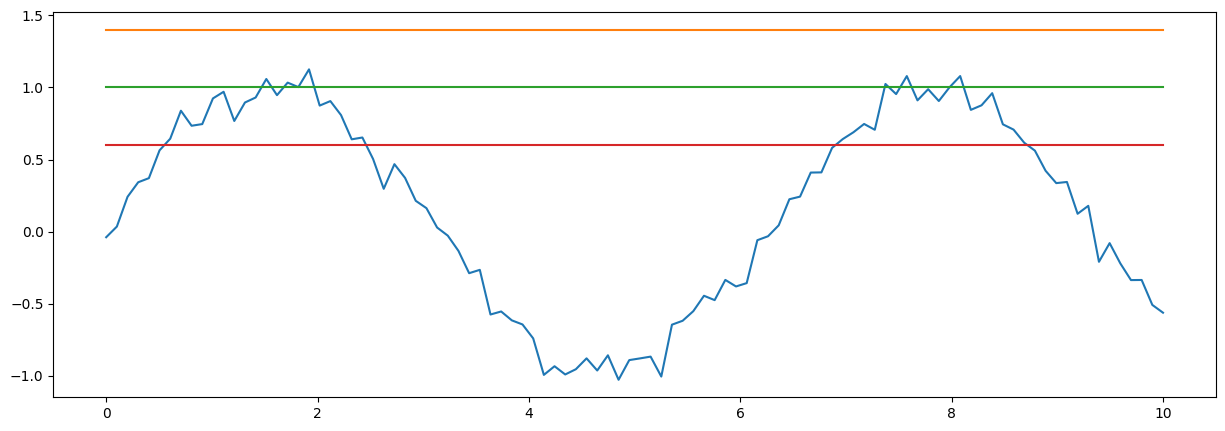

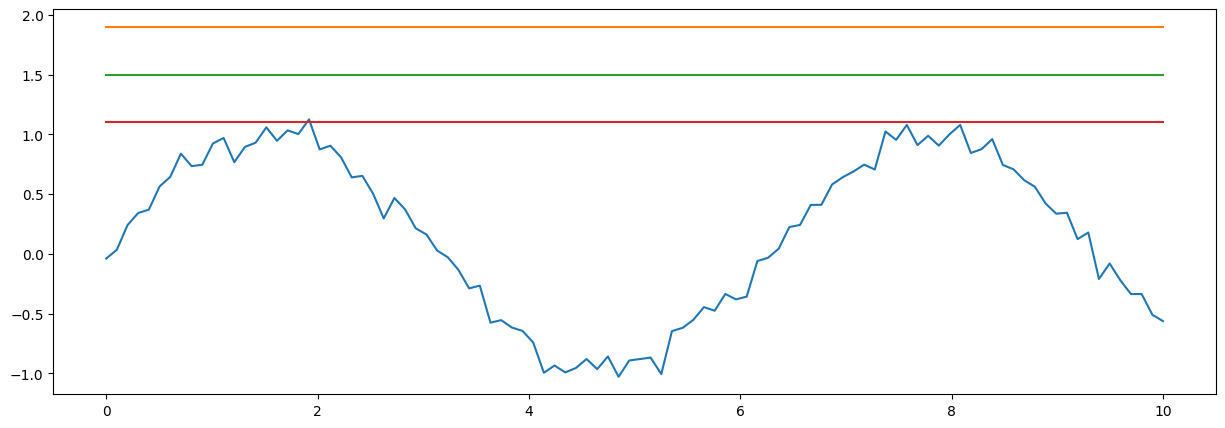

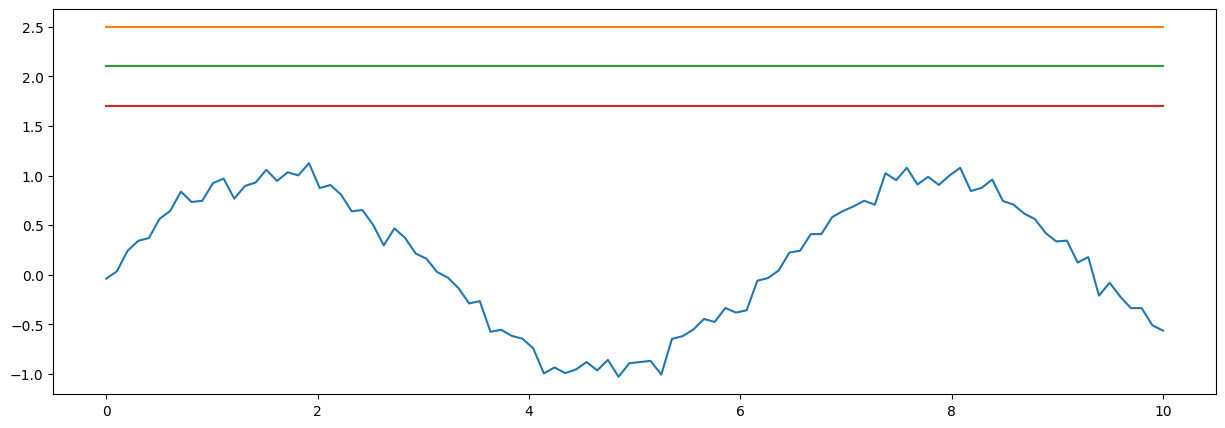

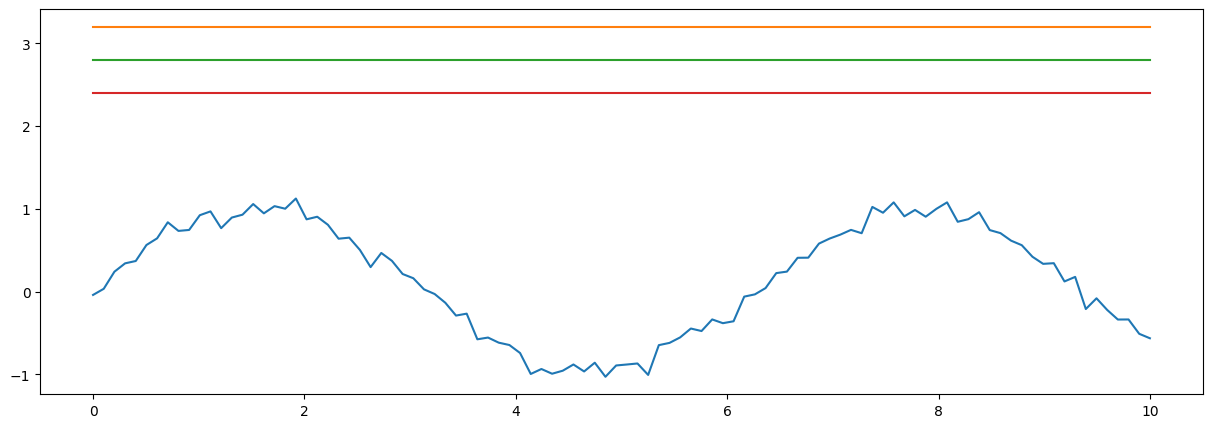

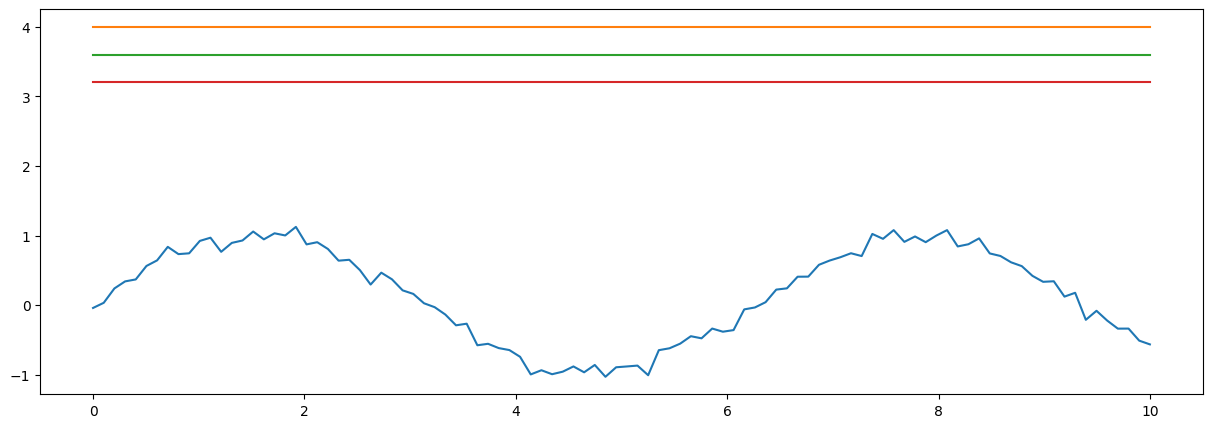

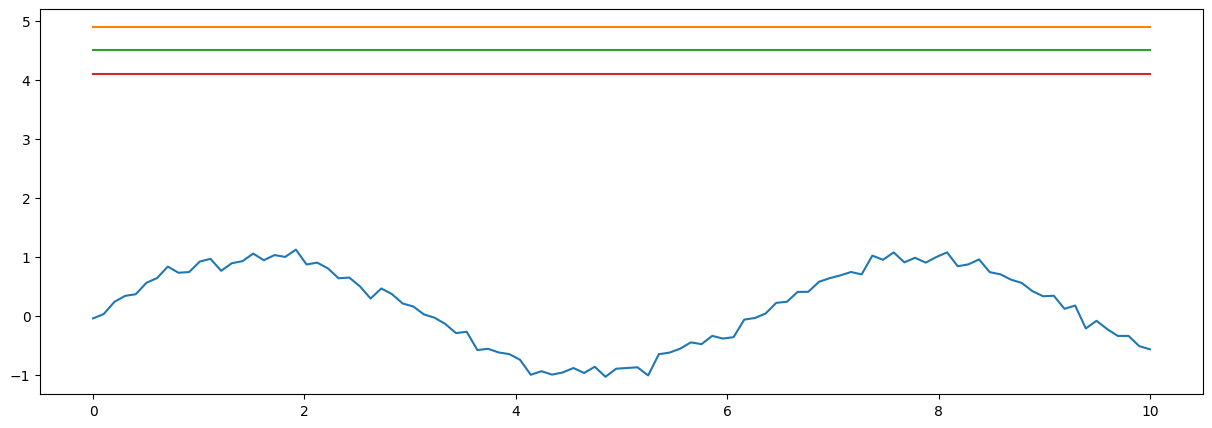

In [14]:
y_hat_edited = y_hat.clone()
for i in range(10):
    i/=10
    y_hat_edited = y_hat_edited + float(i)
    loss = MultiQuantileLoss(quantiles)
    print(loss(y_ground_truth, y_hat_edited, False))
    plt.figure(figsize=(15, 5))
    plt.plot(x.squeeze(), y_ground_truth.squeeze(), label='ground truth')
    # plot different quantiles
    for j, q in enumerate(quantiles):
        plt.plot(x.squeeze(), y_hat_edited.squeeze()[:, j], label=f'quantile {q}')

In [4]:
import torch 
import torch.nn as nn

# a = nn.Sequential(*[nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1))] *3)

In [17]:
# can you make a little example where you have an 1d cnn and pass some random data through it that has shape [batch size=2, horizon length=10, number_of_features=3] 
# data should be random, you can just have the layers and pass data through it like x = torch.randn(2, 10, 3) and then y = a(x) and then print y.shape


In [24]:
import torch
import torch.nn as nn

# Define the 1D CNN model
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=3, out_channels=16, kernel_size=3)

    def forward(self, x):
        x = self.conv1(x)

        return x

# Create random input data
x = torch.randn(2, 3, 100)

# Pass the data through the CNN model
model = MyCNN()
y = model(x)

# Print the shape of the output
print(y.shape)


torch.Size([2, 16, 98])
